# Employee Attrition Analysis – Exploratory Data Analysis

## Business Objective
The goal of this analysis is to explore employee-level data to identify key
patterns and drivers of employee attrition. These insights will later support
the development of a predictive model aimed at proactively reducing employee
turnover and associated costs.

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [7]:
pd.set_option('display.max_columns',None)

In [9]:
pd.set_option('display.float_format', "{:.2f}".format)

In [10]:
DATA_PATH = "../data/raw/WA_Fn-UseC_-HR-Employee-Attrition.csv"

In [12]:
df = pd.read_csv(DATA_PATH)

In [13]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
df['Attrition'].value_counts(normalize = True)

Attrition
No    0.84
Yes   0.16
Name: proportion, dtype: float64

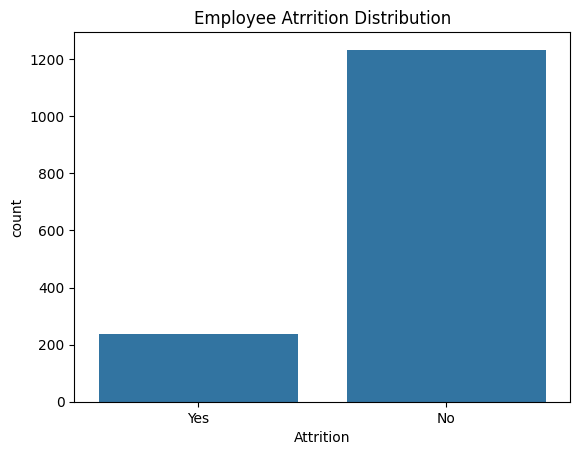

In [16]:
sns.countplot(data = df, x='Attrition')
plt.title('Employee Atrrition Distribution')
plt.show()

In [17]:
numeric_features = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()

In [20]:
categorical_features = df.select_dtypes(include = ['object']).columns.tolist()

In [19]:
df.isna().sum().sort_values(ascending = False)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [26]:
missing_ratio = df.isnull().mean().sort_values(ascending = False)

In [27]:
missing_ratio

Age                        0.00
Attrition                  0.00
BusinessTravel             0.00
DailyRate                  0.00
Department                 0.00
DistanceFromHome           0.00
Education                  0.00
EducationField             0.00
EmployeeCount              0.00
EmployeeNumber             0.00
EnvironmentSatisfaction    0.00
Gender                     0.00
HourlyRate                 0.00
JobInvolvement             0.00
JobLevel                   0.00
JobRole                    0.00
JobSatisfaction            0.00
MaritalStatus              0.00
MonthlyIncome              0.00
MonthlyRate                0.00
NumCompaniesWorked         0.00
Over18                     0.00
OverTime                   0.00
PercentSalaryHike          0.00
PerformanceRating          0.00
RelationshipSatisfaction   0.00
StandardHours              0.00
StockOptionLevel           0.00
TotalWorkingYears          0.00
TrainingTimesLastYear      0.00
WorkLifeBalance            0.00
YearsAtC

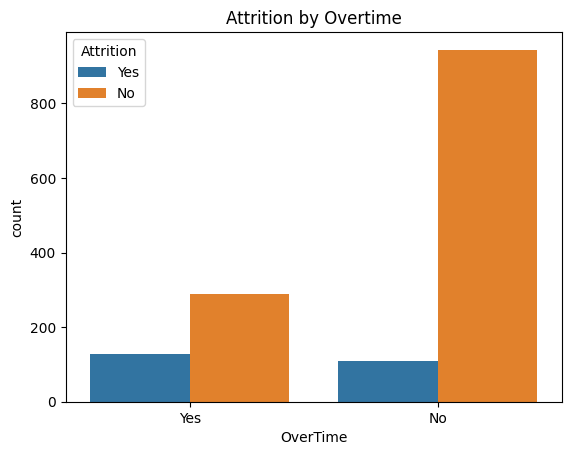

In [21]:
sns.countplot(data = df, x='OverTime', hue = 'Attrition')
plt.title('Attrition by Overtime')
plt.show()

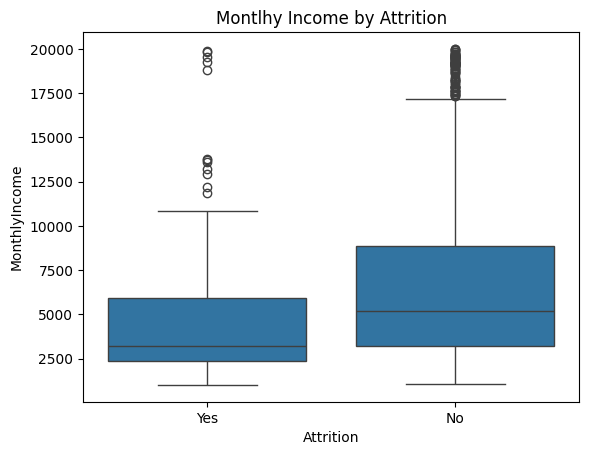

In [22]:
sns.boxplot(data = df, x= 'Attrition', y = 'MonthlyIncome')
plt.title('Montlhy Income by Attrition')
plt.show()

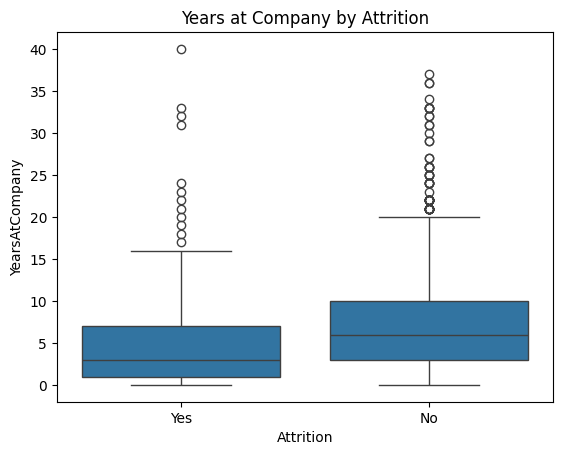

In [23]:
sns.boxplot(data = df, x='Attrition', y = 'YearsAtCompany')
plt.title('Years at Company by Attrition')
plt.show()

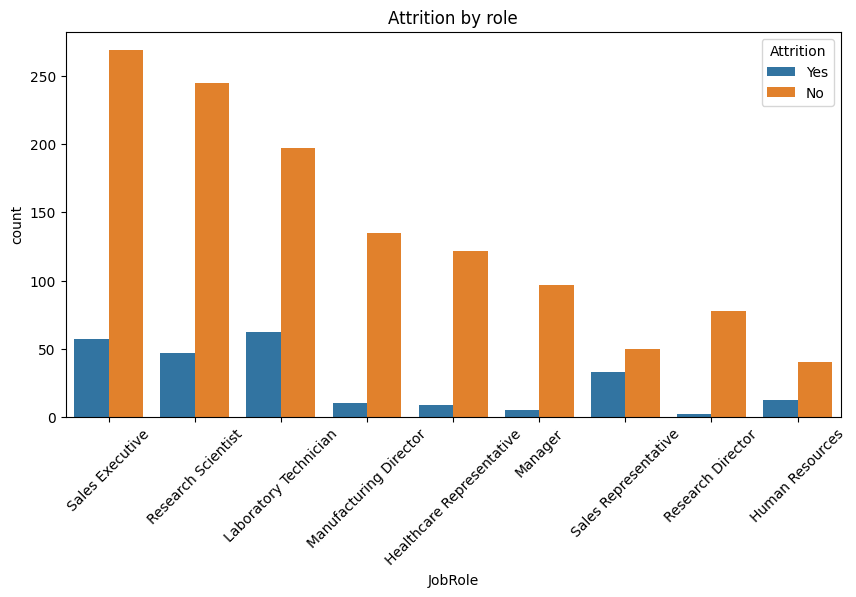

In [25]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'JobRole', hue = 'Attrition')
plt.xticks(rotation = 45)
plt.title('Attrition by role')
plt.show()

## EDA Summary

Key observations from the exploratory analysis:

- Employees working overtime exhibit significantly higher attrition rates.
- Lower monthly income is associated with higher likelihood of attrition.
- Attrition is more common among employees with fewer years at the company.
- Certain job roles show higher attrition tendencies than others.

These insights will guide feature engineering and model development in the
next stages of the project.
